In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.image as mpimg
from PIL import Image

In [2]:
def output_image(image_dir, output_path):
    #image_dir = r"C:\Users\mhr_k\OneDrive\Documents\AI-Research\code\medfusion\linux_results\ctf_samples_06_28_17_25\2"
    ori_img = mpimg.imread(os.path.join(image_dir, "original.png"))
    fig, axes = plt.subplots(1, 5, figsize=(30, 6))
    axes[0].imshow(ori_img, cmap='gray')
    i = 1
    subdirs = os.listdir(image_dir)
    for rid in subdirs:
        subdir = os.path.join(image_dir, rid)
        if not os.path.isdir(subdir):
            continue
        imgs = os.listdir(subdir)
        for img in imgs[:2]:
            img_path = os.path.join(subdir, img)
            img_file = mpimg.imread(img_path)
            axes[i].imshow(img_file, cmap='gray')
            i += 1
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

In [ ]:
data_dir = r"C:\Users\mhr_k\OneDrive\Documents\AI-Research\code\medfusion\linux_results\sample_step20"
for pid in os.listdir(data_dir):
    image_dir = os.path.join(data_dir, pid)
    if not os.path.isdir(image_dir):
        continue
    output_path = os.path.join(data_dir, f"output_{pid}.png")
    output_image(image_dir, output_path)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def add_correlated_gaussian_noise(image, noise_factor=0.1):
    image_array = np.array(image).astype(np.float32)
    noise = np.random.randn(*image_array.shape) * (image_array * noise_factor)
    noisy_image = image_array + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)


def plot_counterfactual_images(observed_img, counterfactual_imgs, labels, interventions, info = 'original race: black \n sex: Female \n Age: 47'):
    # Number of rows and columns in the grid
    n_rows = len(labels)
    n_cols = len(interventions)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))

    for row in range(n_rows):
        for col in range(n_cols):
            ax = axes[row, col]

            if row == 0:
                if col == 0:
                    ax.imshow(np.array(observed_img), cmap='gray')
                else:
                    img = counterfactual_imgs[col - 1]
                    ax.imshow(np.array(img), cmap='gray')
            elif row == 1:
                if col == 0:
                    ax.text(0.5, 0.5, info, fontsize=14, ha='center', va='center')
                else:
                    img = apply_direct_effect_transform(observed_img, counterfactual_imgs[col - 1])  # Placeholder for transformation
                    ax.imshow(np.array(img))

            ax.axis('off')

            if row == 0:
                pass
                #ax.set_title(interventions[col], fontsize=12)

        # Add row labels (e.g., Counterfactual, Direct Effect, Uncertainty)
        axes[row, 0].set_ylabel(labels[row], fontsize=12, rotation=90)

    # Adjust layout
    plt.legend()
    plt.tight_layout()
    plt.show()

def apply_direct_effect_transform(observed_img, counterfactual_img):
    # Convert images to NumPy arrays
    observed_array = np.array(observed_img).astype(np.float32)
    counterfactual_array = np.array(counterfactual_img).astype(np.float32)

    difference_array = counterfactual_array - observed_array

    rgb_array = np.zeros((*difference_array.shape, 3), dtype=np.uint8)

    rgb_array[difference_array > 0, 1] = np.interp(difference_array[difference_array > 0], 
                                                   (0, np.max(difference_array)), (0, 255))
    
    rgb_array[difference_array < 0, 0] = np.interp(-difference_array[difference_array < 0], 
                                                   (0, -np.min(difference_array)), (0, 255))
    
    return Image.fromarray(255 - rgb_array)


def get_counterfactual_images(image_dir):
    ctf_imgs = dict()
    subdirs = os.listdir(image_dir)
    for rid in subdirs:
        subdir = os.path.join(image_dir, rid)
        if not os.path.isdir(subdir):
            continue
        img = os.listdir(subdir)[0]
        img_path = os.path.join(subdir, img)
        ctf_imgs[rid] = Image.open(img_path).convert("L")
    return [ctf_imgs["1"], ctf_imgs["2"]]

In [4]:
image_dir = r"C:\Users\mhr_k\OneDrive\Documents\AI-Research\code\medfusion\linux_results\sample_step20\55"
observed_img = Image.open(os.path.join(image_dir, "original.png")).convert("L")
counterfactual_imgs = get_counterfactual_images(image_dir)

Chexpert

C:\Users\mhr_k\AppData\Local\Temp\ipykernel_7520\2823044250.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


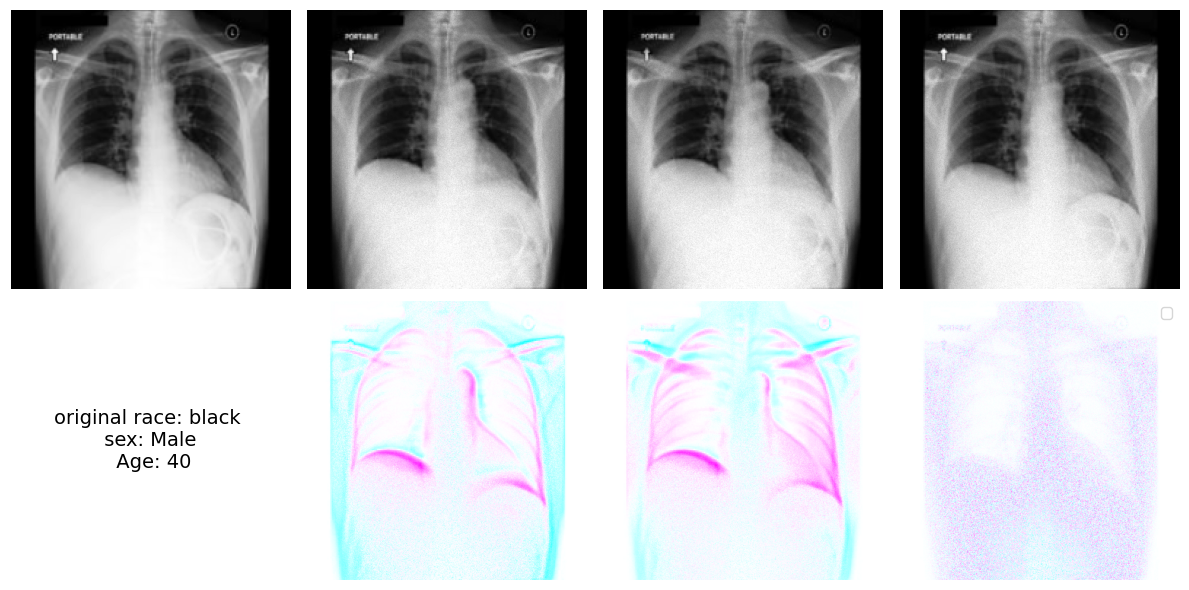

In [8]:

# Example usage with observed and counterfactual images as PIL.Image objects
image_dir = r"C:\Users\mhr_k\OneDrive\Documents\AI-Research\code\medfusion\linux_results\ctf_sample_show_cxp\8-black-male-40"
observed_img = Image.open(os.path.join(image_dir, "image.png")).convert("L")
counterfactual_imgs = [Image.open(os.path.join(image_dir, f"image ({i}).png")).convert("L") for i in range(1,4)]
for i in range(3):
    counterfactual_imgs[i] = add_correlated_gaussian_noise(counterfactual_imgs[i], 0.05)
# Example labels and interventions
labels = ["Counterfactual", "Per-pixel Difference"]
interventions = ["observation", "do(race = White)", "do(race=Asian)", "do(race=Black)"]

# Call the plotting function with your images
plot_counterfactual_images(observed_img, counterfactual_imgs, labels, interventions, info = 'original race: black \n sex: Male \n Age: 40')


MIMIC

C:\Users\mhr_k\AppData\Local\Temp\ipykernel_7520\2823044250.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


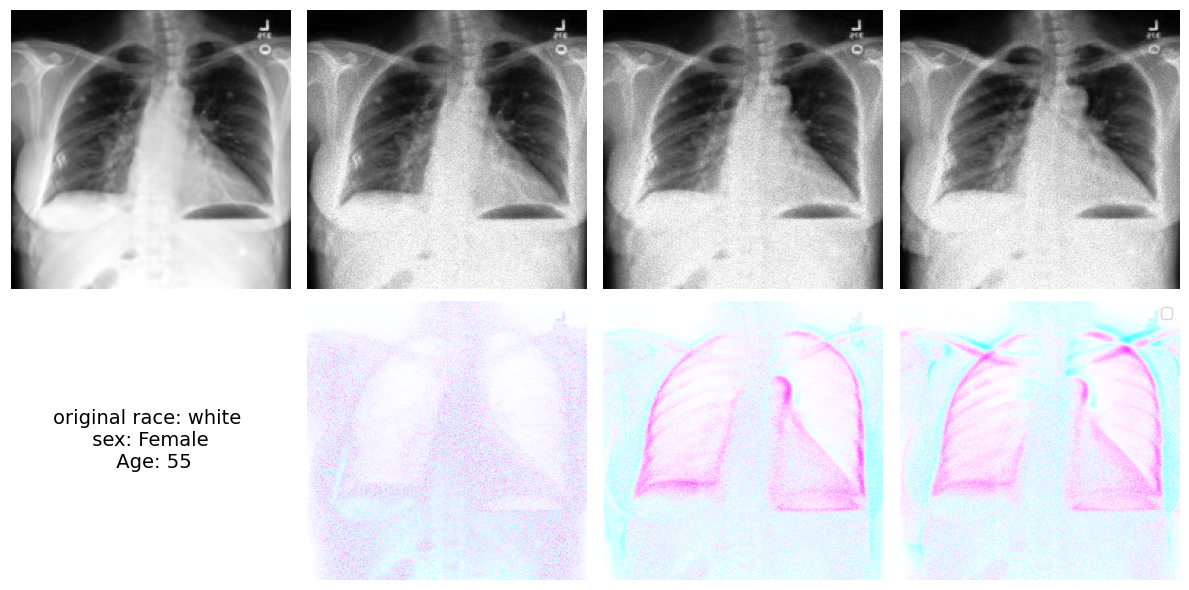

In [14]:
# Example usage with observed and counterfactual images as PIL.Image objects
image_dir = r"C:\Users\mhr_k\OneDrive\Documents\AI-Research\code\medfusion\linux_results\ctf_sample_show_mimic\white-55-female"
observed_img = Image.open(os.path.join(image_dir, "image.png")).convert("L")
counterfactual_imgs = [Image.open(os.path.join(image_dir, f"image ({i}).png")).convert("L") for i in range(1,4)]
for i in range(3):
    counterfactual_imgs[i] = add_correlated_gaussian_noise(counterfactual_imgs[i], 0.116)
# Example labels and interventions
labels = ["Counterfactual", "Per-pixel Difference"]
interventions = ["observation", "do(race = White)", "do(race=Asian)", "do(race=Black)"]

# Call the plotting function with your images
plot_counterfactual_images(observed_img, counterfactual_imgs, labels, interventions, info = 'original race: white \n sex: Female \n Age: 55')